In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
C_file = './data/clustering_run1511_Nsig_8_Mcut_300_Pcut_0_scale_8_close_2_nccs.txt'
C_file = './data/clustering_run1511_Nsig_9_Mcut_300_Pcut_0_scale_4_close_2_nccs.txt'
#C_file = './data/clustering_run813_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'

VarNames=["iTr", "TrOk", "SumLight", "SumBck", "SumPixel", "pClose", "x0m", "x0s", "y0m", "y0s", "ddx", "ddy", "x0start", "y0start", "x0end", "y0end"]
df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)


$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

In [40]:
df.head()

,iTr,TrOk,SumLight,SumBck,SumPixel,pClose,x0m,x0s,y0m,y0s,ddx,ddy,x0start,y0start,x0end,y0end
0,0.0,0.0,5531.0,4740.49,25.0,3.0,1028.0,33.447098,49.0,7.852813,7.0,11.0,1028.0,44.0,1028.0,52.0
1,0.0,1.0,3686.0,3164.27,20.0,2.0,1509.0,45.459641,91.0,7.258389,3.0,7.0,1508.0,88.0,1508.0,92.0
2,0.0,2.0,3672.0,3164.18,16.0,2.0,1483.0,44.531637,95.0,13.988090,7.0,7.0,1480.0,92.0,1484.0,96.0
3,0.0,3.0,5511.0,4729.15,25.0,3.0,1341.0,42.455859,116.0,15.390744,11.0,11.0,1344.0,112.0,1336.0,120.0
4,0.0,4.0,5515.0,4735.07,30.0,3.0,1140.0,25.176618,124.0,7.542980,7.0,7.0,1140.0,120.0,1140.0,124.0


In [41]:
df.info()
track_lenght = np.sqrt(df['ddx']**2+df['ddy']**2)
photons      = df['SumLight']-df['SumBck']
pixel        = df['SumPixel']
dff = pd.DataFrame({'photons':photons,'pixel':pixel , 'track_lenght':track_lenght})
dff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380625 entries, 0 to 380624
Data columns (total 16 columns):
iTr         380625 non-null float64
TrOk        380625 non-null float64
SumLight    380625 non-null float64
SumBck      380625 non-null float64
SumPixel    380625 non-null float64
pClose      380625 non-null float64
x0m         380625 non-null float64
x0s         380625 non-null float64
y0m         380625 non-null float64
y0s         380625 non-null float64
ddx         380625 non-null float64
ddy         380625 non-null float64
x0start     380625 non-null float64
y0start     380625 non-null float64
x0end       380625 non-null float64
y0end       380625 non-null float64
dtypes: float64(16)
memory usage: 46.5 MB


,photons,pixel,track_lenght
0,790.51,25.0,13.038405
1,521.73,20.0,7.615773
2,507.82,16.0,9.899495
3,781.85,25.0,15.556349
4,779.93,30.0,9.899495


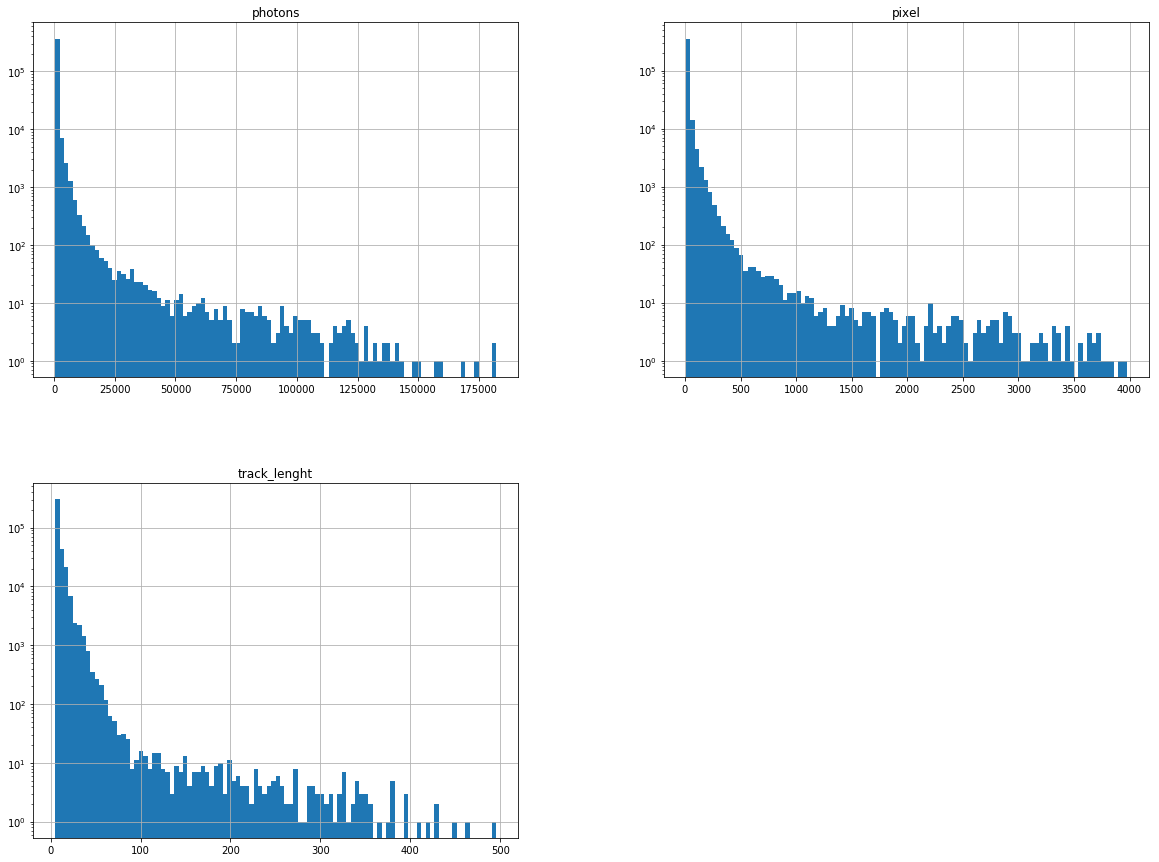

In [4]:
dff.hist(bins=100, figsize=(20,15), log=True)
plt.show()

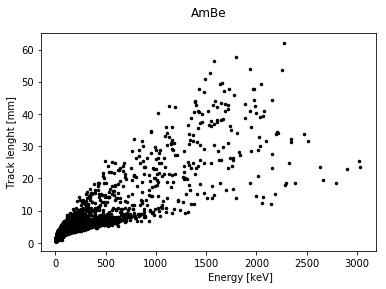

In [44]:
pixelsize = 0.125
en = (df['SumLight']-df['SumBck'])/(0.06*1000)
tl =  np.sqrt(np.array(df['ddx'])**2+np.array(df['ddy'])**2)*pixelsize
#en = en[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
#        (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)] 
#tl = tl[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
#       (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
plt.plot(en,tl, 'k.', label="in fiducial AmBe",  markersize=5)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim((0, 10))
#plt.xlim((0, 100))

plt.xlabel(r'Energy [keV]', horizontalalignment = 'left')
plt.ylabel(r'Track lenght [mm]')
plt.title("AmBe", y=1.05)
plt.show()

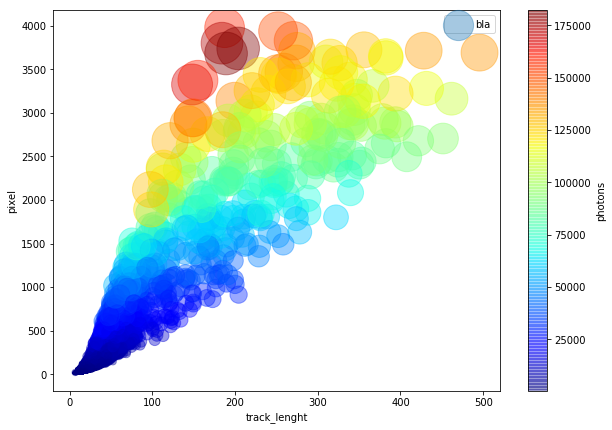

In [5]:
#plt.plot(dl, lp, '.r')
#plt.ylim(0,70)
#plt.xscale('log')
#plt.show()
dff.plot(kind="scatter", x="track_lenght", y="pixel", alpha=0.4,
    s=dff["photons"]/100, label="bla", figsize=(10,7),
    c="photons", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.show()

In [6]:
from sklearn import cluster
X = np.array(dff)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

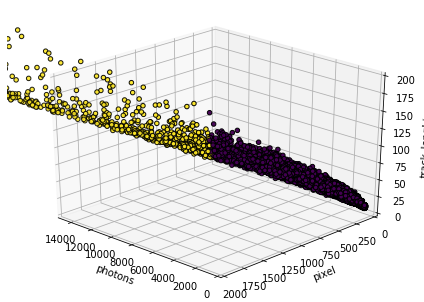

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
labels = dff.columns
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)
labels = k_means.labels_
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float), edgecolor='k')

ax.set_xlim3d(0, 15000)
ax.set_ylim3d(0, 2000)
#ax.set_yscale('log')
ax.set_zlim3d(0, 200)
ax.set_xlabel('photons')
ax.set_ylabel('pixel')
ax.set_zlabel('track_lenght')
plt.show()


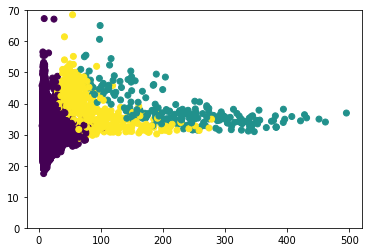

In [8]:
labels = dff.columns
labels = k_means.labels_
plt.scatter(X[:,2], X[:,0]/X[:,1], c=labels.astype(np.float))
#plt.xscale('log')
plt.ylim(0,70)
plt.show()

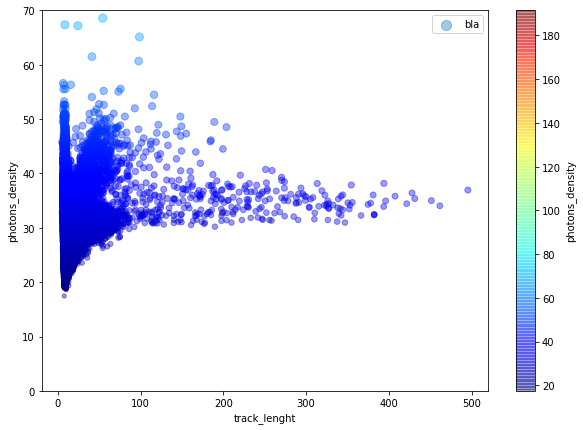

In [9]:
track_lenght = np.sqrt(df['ddx']**2+df['ddy']**2)
photons_density = (df['SumLight']-df['SumBck'])/df['SumPixel']
dff2 = pd.DataFrame({'photons_density':photons_density, 'track_lenght':track_lenght})
dff2.plot(kind="scatter", x="track_lenght", y="photons_density", alpha=0.4,
    s=dff2["photons_density"], label="bla", figsize=(10,7),
    c="photons_density", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.ylim(0,70)
plt.show()

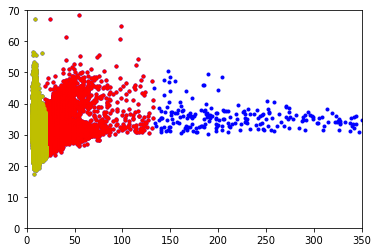

In [10]:
from sklearn import cluster
X = np.array(dff2)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_

#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
#plt.xscale('log')
plt.plot(X[:,1], X[:,0],'b.', label="bla")
plt.plot(X[:,1][labels==0], X[:,0][labels==0],'r.', label="bla")
plt.plot(X[:,1][labels==1], X[:,0][labels==1],'y.', label="bla")
#plt.plot(X[:,1][labels==2], X[:,0][labels==2],'g.', label="bla")
plt.ylim(0,70)
plt.xlim(0,350)
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors
X = df.values
#X = [lig, lun]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [12]:
df_sig=df[df.SumPixel>80]
df_bkg=df[df.SumPixel<=80]

TrOk


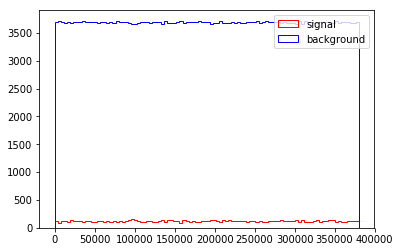

SumLight


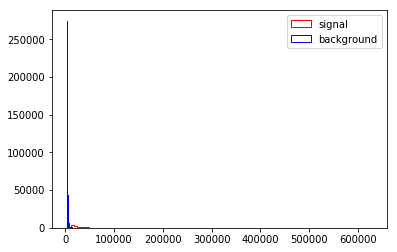

SumBck


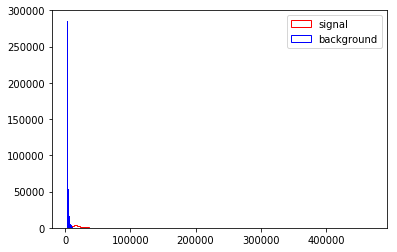

SumPixel


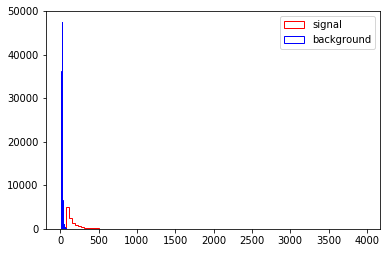

pClose


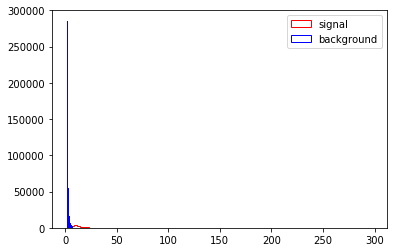

x0m


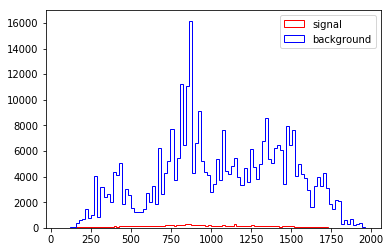

x0s


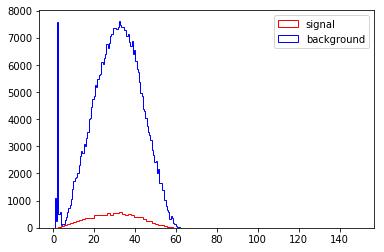

y0m


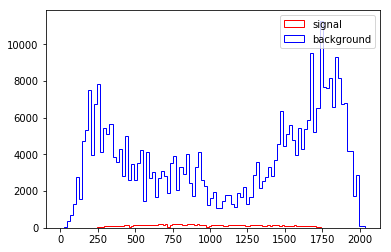

y0s


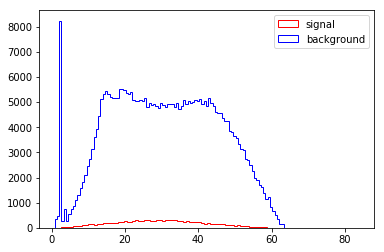

ddx


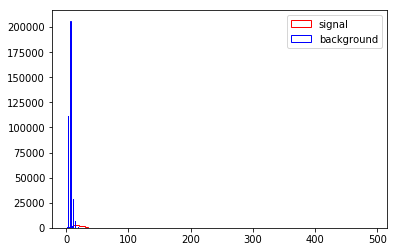

ddy


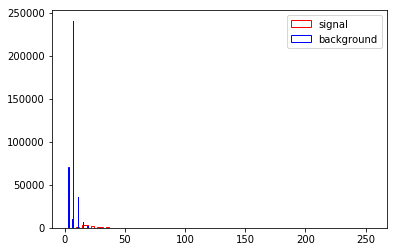

x0start


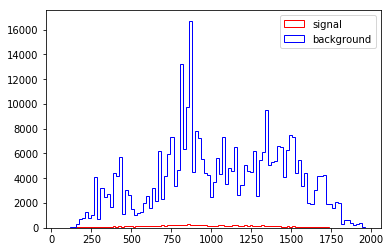

y0start


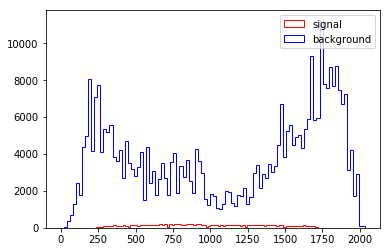

x0end


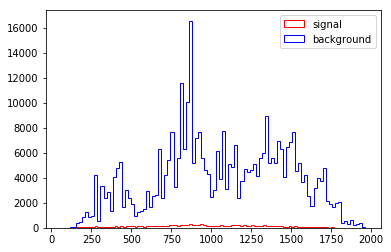

y0end


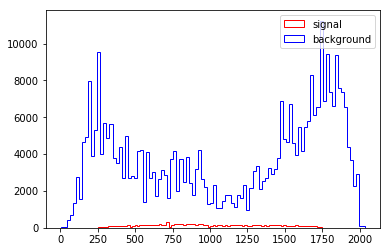

In [13]:
for var in VarNames[1:]:
    print (var)
    plt.figure()
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

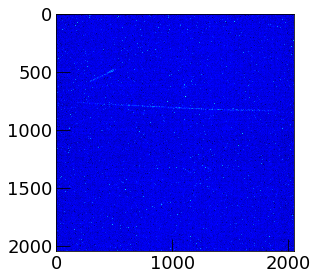

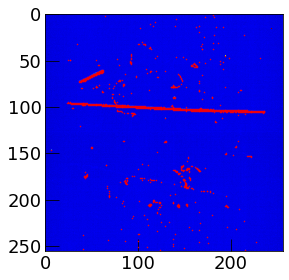

In [423]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
%matplotlib inline
x_resolution = y_resolution = 2048
from itertools import combinations
pixelscale  = 0.125 #55e-3 #Orange 0.125 for lemonn mm/pixel
nsigma      = 1
run         = 1511 #725# 478 # 1511
traccia     = 340 # 880
cimax       = 300
cimin       = 95# 85
rebin_th_image = 116 # 116
dataSelection = 'LTD'
rescale = 256
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
plt.imshow(image, vmin=cimin,vmax=cimax, cmap='jet')
th_image = image
plt.show()
rebin_image     = cy.rebin(image, (rescale, rescale))

plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
points          = np.array(np.nonzero(edges)).T.astype(float) 
plt.plot(points[:,1], points[:,0], 'r.', markersize=1)
plt.show()

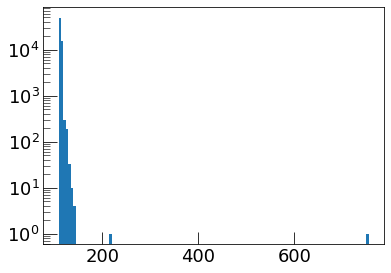

In [424]:
plt.hist(rebin_image.ravel(),bins=128, log=True)
plt.show()
#from sklearn import cluster
#import numpy as np
#y,x = np.histogram(rebin_image.ravel(), bins=128)
#X = np.asmatrix(np.array([x[1:],y]))
#k_means = cluster.KMeans(n_clusters=2)
#k_means.fit(X)
#labels = k_means.labels_
#plt.hist(X, range=(0,300), bins=128)
#plt.hist(X[labels==0], range=(0,300), bins=128,color = 'r')
#plt.yscale('log')
#plt.show()

In [425]:

from sklearn.neighbors import NearestNeighbors
X = rebin_image
#X = [lig, lun]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)

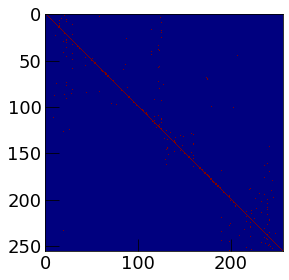

In [426]:
nbrs.kneighbors_graph(X).toarray()
plt.imshow(nbrs.kneighbors_graph(X).toarray(), vmin=0,vmax=1, cmap='jet')
plt.show()


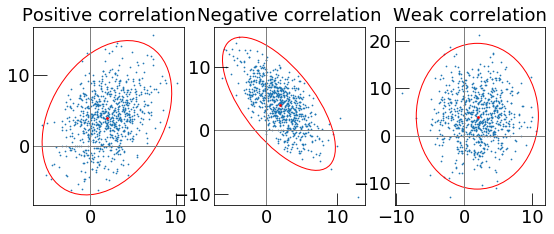

In [427]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': np.array([[0.85, 0.35],
                                      [0.15, -0.65]]),
    'Negative correlation': np.array([[0.9, -0.4],
                                      [0.1, -0.6]]),
    'Weak correlation': np.array([[1, 0],
                                  [0, 1]]),
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

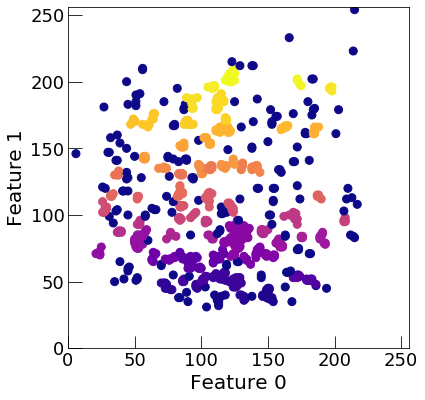

-1 173 19809.28125 114.50451589595376
0 10 1149.109375 114.9109375
1 17 1947.234375 114.54319852941177
2 6 691.203125 115.20052083333333
3 9 1034.078125 114.89756944444444
4 5 576.03125 115.20625
5 36 4124.03125 114.55642361111111
6 5 576.03125 115.20625
7 7 806.59375 115.22767857142857
8 9 1034.078125 114.89756944444444
9 7 806.59375 115.22767857142857
10 31 3552.671875 114.6023185483871
11 4 462.140625 115.53515625
12 16 1831.90625 114.494140625
13 7 806.59375 115.22767857142857
14 7 806.59375 115.22767857142857
15 4 462.140625 115.53515625
16 11 1261.796875 114.70880681818181
17 11 1261.796875 114.70880681818181
18 60 6865.828125 114.43046875
19 7 806.59375 115.22767857142857
20 28 3208.765625 114.59877232142857
21 18 2061.5625 114.53125
22 10 1149.109375 114.9109375
23 4 462.140625 115.53515625
24 4 462.140625 115.53515625
25 6 691.203125 115.20052083333333
26 10 1149.109375 114.9109375
27 6 691.203125 115.20052083333333
28 5 576.03125 115.20625
29 9 1034.078125 114.89756944444444


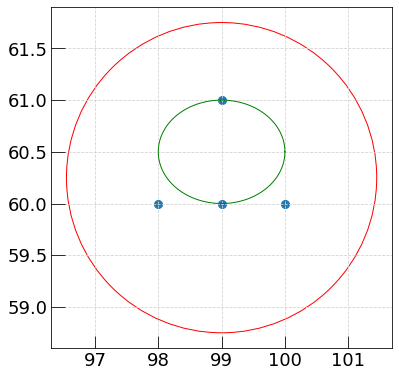

In [494]:
import cygnus_lib as cy
cy.set_atlas_style('square')
def cluster_elips(points):
    x0i= np.argmin(points[:,1])
    a0 = points[x0i][1]
    x1i= np.argmax(points[:,1])
    a1 = points[x1i][1]
    y0i= np.argmin(points[:,0])
    b0 = points[y0i][0]
    y1i= np.argmax(points[:,0])
    b1 = points[y1i][0]
    print (a0, a1, b0, b1, x0i, points[x0i])
    a  = (a1 - a0)/2.
    b  = (b1 - b0)/2.
    x0 = (a1 + a0)/2.
    y0 = (b1 + b0)/2.
    theta = np.arctan((points[x1i][0]-points[x0i][0])/(points[x1i][1]-points[x0i][1]))
    return x0, y0, a , b, theta

from matplotlib import patches
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)

dbscan = DBSCAN(eps=0.1, min_samples = 4) # eps=0.1
dbscan.fit(points)

clusters = dbscan.fit_predict(X_scaled)
plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.xlim(0,rebin_image.shape[0])
plt.ylim(0,rebin_image.shape[1])
plt.show()


for i in range (min(dbscan.labels_), max(dbscan.labels_)):
    ph = 0
    for j in range(0, len(points[:,1][dbscan.labels_==i])):
        ph += (rebin_image[int(points[j,1]), int(points[j,0])])
    print(i,np.sum([dbscan.labels_==i]), ph, ph/np.sum([dbscan.labels_==i]))
plt.show()
fig, ax = plt.subplots()
ic = 11
ax.scatter(points[:,1][dbscan.labels_==ic], points[:,0][dbscan.labels_==ic])
x0, y0, a, b, theta = cluster_elips(points[dbscan.labels_==ic])
confidence_ellipse(points[:,1][dbscan.labels_==ic], points[:,0][dbscan.labels_==ic], ax, edgecolor='red')
t = np.linspace(0, 2*np.pi, 100)
print (x0, y0, a, b, theta)
plt.plot(x0 + a*np.cos(t)*np.cos(theta) - b*np.sin(t)*np.sin(theta) , 
         y0 + b*np.sin(t)*np.cos(theta) + a*np.cos(t)*np.sin(theta), 'g-')
plt.grid(color='lightgray',linestyle='--')

plt.show()

Event: 0
[0, -1, 320, 31751.578125, 99.223681640625, 3, 170, 254, 215]


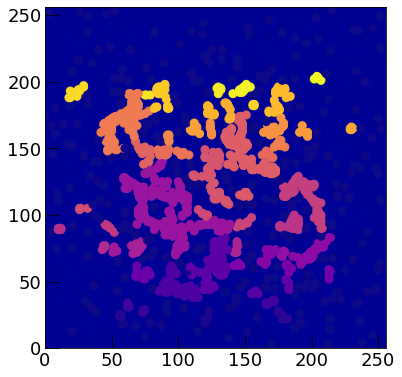

Event: 20
[0, 19, 15, 1493.640625, 99.57604166666667, 71, 66, 80, 71]


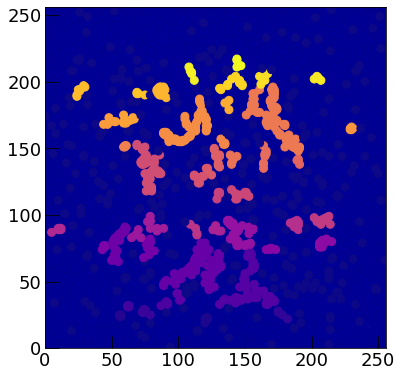

Event: 40
[0, 39, 7, 694.671875, 99.23883928571429, 160, 125, 169, 124]


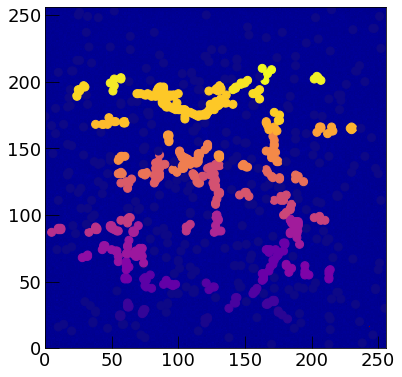

Event: 60
[1, 4, 5, 494.84375, 98.96875, 31, 62, 34, 62]


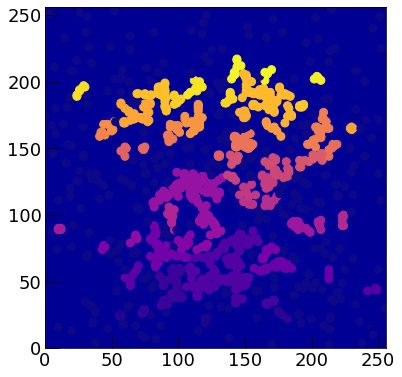

Event: 80
[1, 24, 4, 397.265625, 99.31640625, 121, 163, 122, 164]


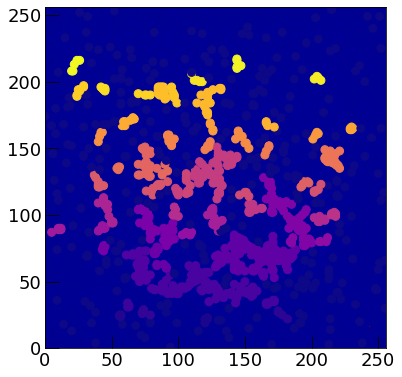

out file ./data/dbscan_run725_cmin_95_cmax_300_rescale_256_rebin_th_image_101_ev_100.txt


In [526]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
nsigma      = 1   

run         = 1514 # 725 Co60 # 1514 AmBe
cimax       = 300  # 300 nr # 130 ph
cimin       = 95   
dataSelection = 'LTD' # LAB Co60 # LTD AmBe
rebin_th_image = 116 # 101 Co60 # 116 AmBe

run         = 725 # Co60 
cimax       = 300 # Co60 
cimin       = 95   
dataSelection = 'LAB'# Co60 
rebin_th_image = 101 # Co60 

rescale = 256
max_image=np.size(cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, run, 'H5')))
data_to_save = []
max_image = 100
for iTr in range(0, max_image):

    image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, iTr))
    rebin_image     = cy.rebin(image, (rescale, rescale))

    edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
    points          = np.array(np.nonzero(edges)).T.astype(float) 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(points)

    dbscan = DBSCAN(eps=0.1, min_samples = 4) # 4
    dbscan.fit(points)

    clusters = dbscan.fit_predict(X_scaled)

    for i in range (min(dbscan.labels_), max(dbscan.labels_)):
        ph = 0.
        yc = points[:,1][dbscan.labels_==i]
        xc = points[:,0][dbscan.labels_==i]
        for j in range(0, len(xc)):
            x=int(xc[j])
            y=int(yc[j])
            ph += (rebin_image[y,x])
            if j == 0:
                x0start = x
                y0start = y
        x0end = x
        y0end = y
        data_to_save.append([iTr, i, np.sum([dbscan.labels_==i]), ph, ph/np.sum([dbscan.labels_==i]), 
                             x0start, y0start, x0end, y0end])
    if iTr % 20 == 0:
        print ('Event:', iTr)
        print (data_to_save[iTr])
        plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
        plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
        plt.xlim(0,rescale)
        plt.ylim(0,rescale)
        plt.show()
files = ("./data/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d_rebin_th_image_%d_ev_%d.txt" % 
                 (run, cimin, cimax, rescale, rebin_th_image, max_image))
np.savetxt(files, data_to_save, fmt='%.10e', delimiter=" ")
print ("out file", files)

In [502]:
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", "x0end", "y0end"]
C_file = './data/dbscan_run1511_cmin_95_cmax_250_rescale_256_rebin_th_image_116_ev_1000.txt' # AmBe 440
# C_file = './data/dbscan_run478_cmin_95_cmax_130_rescale_256.txt' # Co60 ORANGE
#C_file = './data/dbscan_run1514_cmin_95_cmax_250_rescale_256_rebin_th_image_116_ev_100.txt' # AmBe 450
#C_file = './data/dbscan_run725_cmin_95_cmax_130_rescale_256_rebin_th_image_101_ev_100.txt' # Co60 LEMON 450
#C_file = './data/dbscan_run724_cmin_95_cmax_130_rescale_256_rebin_th_image_101_ev_100.txt' #  LEMON 450 senza sorgente
C_file = './data/dbscan_run1514_cmin_95_cmax_300_rescale_256_rebin_th_image_117_ev_100.txt' # AmBe 440


df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
# range
# charge distribution
# charge asimettriy
df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start']))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


In [479]:
df.head()#[df['cluster_lable']==2]
#df.iloc[:,1:4].head()

,iTr,cluster_lable,pixels,photons,ph_pixels,x0start,y0start,x0end,y0end,length
0,0.0,-1.0,148.0,16964.921875,114.627851,33.0,125.0,254.0,215.0,221.203526
1,0.0,0.0,8.0,922.531250,115.316406,33.0,119.0,38.0,110.0,4.000000
2,0.0,1.0,5.0,564.890625,112.978125,33.0,168.0,34.0,169.0,1.414214
3,0.0,2.0,45.0,5138.890625,114.197569,35.0,88.0,55.0,79.0,19.773720
4,0.0,3.0,10.0,1134.125000,113.412500,36.0,136.0,41.0,132.0,4.582576


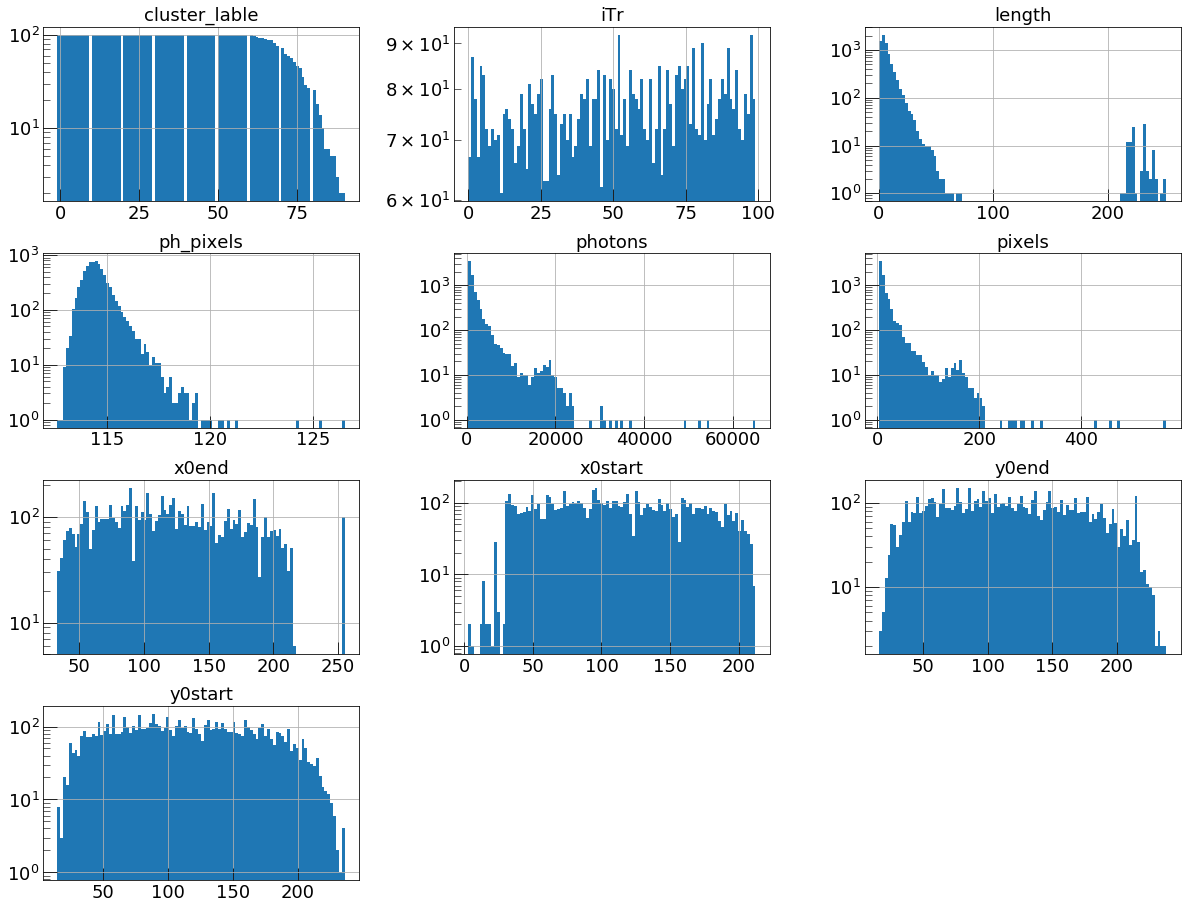

In [480]:
df.hist(bins=100, figsize=(20,15), log=True)
plt.show()

# Custs & Normalizzation!

scale 8 1.00
ellisse: 120.00, 100.00 [mm]


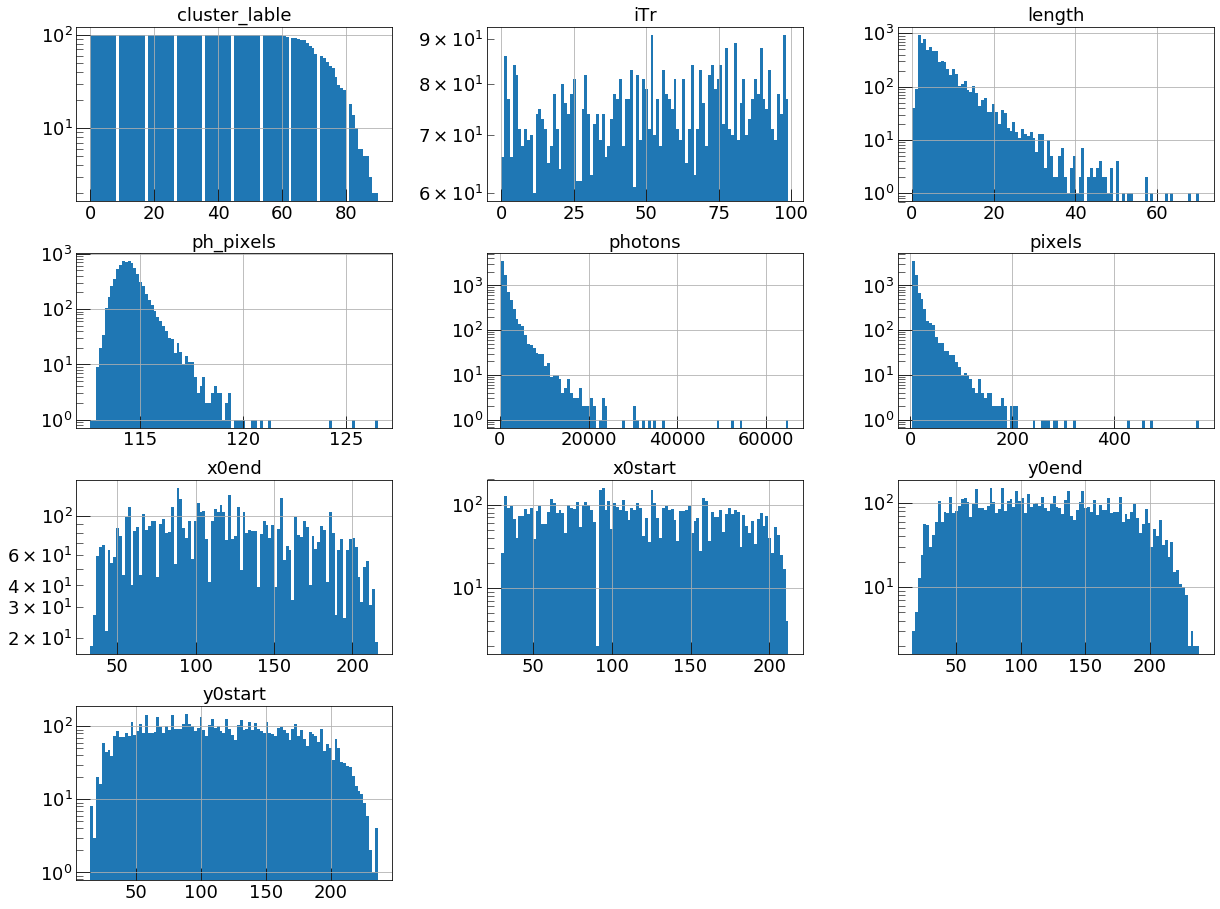

In [481]:
phKev = 1169/5.9 # @ 450
pixelscale = 0.125 # mm
x_resolution = y_resolution = 2048
rescale = 256
xyscale = x_resolution/rescale
DX = -5
DY = 7
a = 120 # mm
b = 100 # mm
rescale_pixelscale = xyscale*pixelscale
print("scale %d %.2f" % (xyscale,rescale_pixelscale))

print ("ellisse: %.2f, %.2f [mm]" % (a,b))
cluster = df['cluster_lable'] > -1
dfc = df[cluster]
#dfc = dfc[(df['x0start'] > 50) & (df['x0end'] < 200) & (df['y0start'] > 50) & (df['y0end'] < 200)]
dfc.hist(bins=100, figsize=(20,15), log=True)
plt.show()



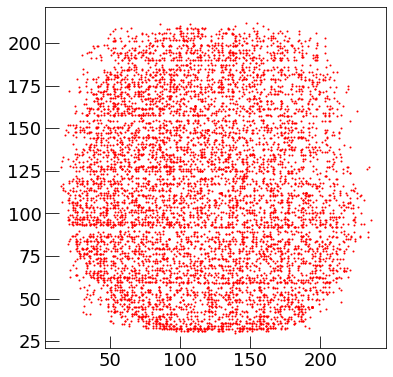

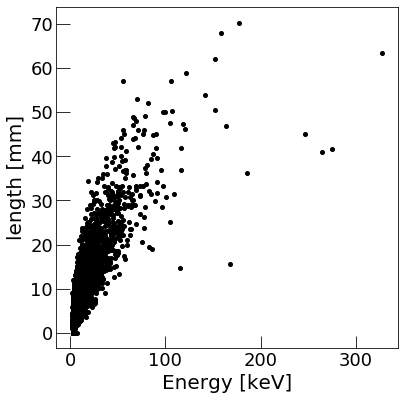

In [482]:
#plt.plot(df['y0start'], df['x0start'], 'k.', markersize=1)
y = dfc['y0start']*rescale_pixelscale
x = dfc['x0start']*rescale_pixelscale
l = dfc['length']*rescale_pixelscale
e = dfc['photons']/phKev
plt.plot(y, x, 'r.', markersize=2)
#plt.plot(x[((x-rescale/2)**2/a**2  + (y-rescale/2)**2/b**2)<1],
#         y[((x-rescale/2)**2/a**2  + (y-rescale/2)**2/b**2)<1], 
#         "g.", markersize=2)
plt.show()
#plt.plot(e[e<10000], l[e<10000], 'k.')
plt.plot(e, l, 'k.')
plt.xlabel("Energy [keV]")
#plt.xlabel("Photons")
plt.ylabel("length [mm]")

plt.show()

7486 7586


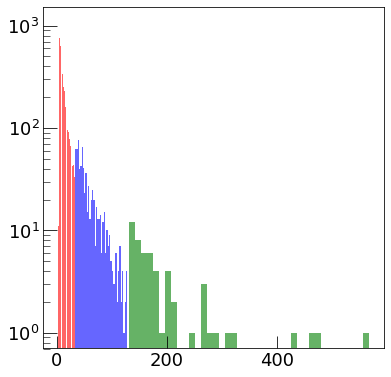

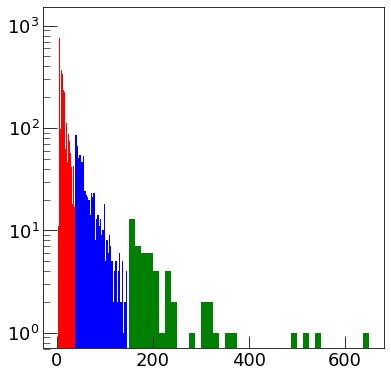

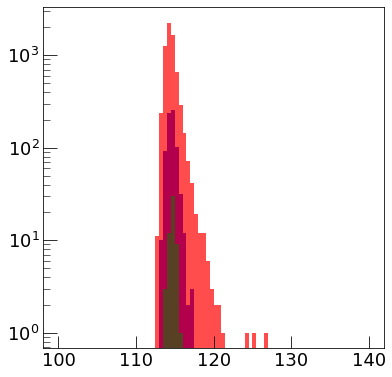

In [483]:
from sklearn import cluster
X = dfc.iloc[:,2:5]
#X = df.iloc[:,1:4]
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_
print (len(labels), len(df.iloc[:,2]))
plt.hist(X.iloc[:,0][labels==0], bins=40, color='b', log=True, alpha=0.6)
plt.hist(X.iloc[:,0][labels==1], bins=40, color='r', log=True, alpha=0.6)
plt.hist(X.iloc[:,0][labels==2], bins=40, color='g', log=True, alpha=0.6)
#plt.hist(X.iloc[:,0][labels==3], bins=40, color='y', log=True, alpha=0.6)

plt.show()
plt.hist(X.iloc[:,1][labels==0]/eVKev, bins=40, color='b', log=True)
plt.hist(X.iloc[:,1][labels==1]/eVKev, bins=40, color='r', log=True)
plt.hist(X.iloc[:,1][labels==2]/eVKev, bins=40, color='g', log=True)
#plt.hist(X.iloc[:,1][labels==3]/eVKev, bins=40, color='y', log=True)

plt.show()

plt.hist(X.iloc[:,2][labels==0], bins=80, color='b', log=True, range=(100, 140))
plt.hist(X.iloc[:,2][labels==1], bins=80, color='r', log=True, range=(100, 140), alpha=0.7)
plt.hist(X.iloc[:,2][labels==2], bins=80, color='g', log=True, range=(100, 140), alpha=0.5)
#plt.hist(X.iloc[:,2][labels==3], bins=40, color='y', log=True, range=(90, 130))


plt.show()

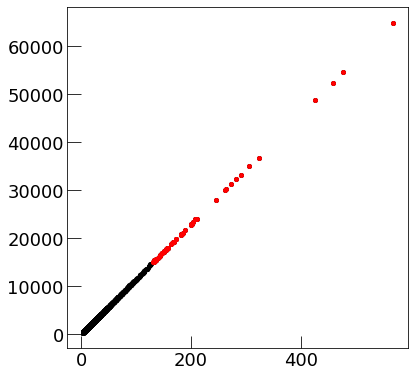

In [484]:
plt.plot(X.iloc[:,0], X.iloc[:,1], 'k.')
plt.plot(X.iloc[:,0][labels==2], X.iloc[:,1][labels==2], 'r.')
plt.show()

In [485]:
X.head()

,pixels,photons,ph_pixels
1,8.0,922.531250,115.316406
2,5.0,564.890625,112.978125
3,45.0,5138.890625,114.197569
4,10.0,1134.125000,113.412500
5,60.0,6818.609375,113.643490


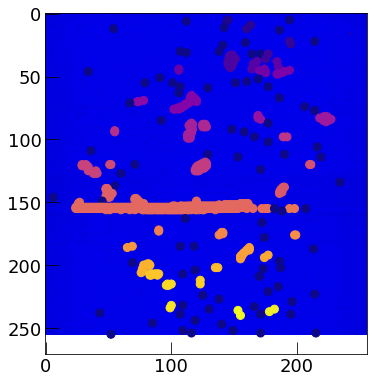

85 1545.78125
2 36.59375
2 36.59375
2 36.59375
2 36.59375
41 736.5625
3 54.3125
2 36.59375
2 36.59375
5 88.40625
5 88.40625
28 502.0
3 54.3125
4 71.03125
12 213.21875
24 429.125
10 175.96875
2 36.59375
2 36.59375
43 773.265625
16 284.734375
2 36.59375
2 36.59375
11 194.9375
15 266.953125
418 8540.359375
3 54.3125
2 36.59375
2 36.59375
5 88.40625
2 36.59375
2 36.59375
12 213.21875
2 36.59375
12 213.21875
2 36.59375
10 175.96875
2 36.59375
5 88.40625
2 36.59375
2 36.59375


ValueError: Incorrect number of features. Got 2 features, expected 3

In [486]:
run         = 1511
traccia     = 2 #3
cimax       = 300
cimin       = 95# 85
dataSelection = 'LTD'
rescale = 256
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
rebin_image     = cy.rebin(image, (rescale, rescale))
rebin_th_image = 116
plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
points          = np.array(np.nonzero(edges)).T.astype(float) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)

dbscan = DBSCAN(eps=0.1, min_samples = 2)
dbscan.fit(points)

clusters = dbscan.fit_predict(X_scaled)
plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
plt.show()
data = []

for i in range (min(dbscan.labels_), max(dbscan.labels_)):
    ph = 0
    for j in range(0, len(points[:,1][dbscan.labels_==i])):
        ph += (rebin_image[int(points[j,1]), int(points[j,0])])-cimin
    data.append([np.sum([dbscan.labels_==i]), ph])
    print (np.sum([dbscan.labels_==i]), ph)
print(k_means.predict(data))

In [527]:
VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels", "x0start", "y0start", "x0end", "y0end"]
C_file = './data/dbscan_run1514_cmin_95_cmax_300_rescale_256_rebin_th_image_116_ev_100.txt' # AmBe 450
#C_file = './data/dbscan_run1514_cmin_95_cmax_300_rescale_256_rebin_th_image_117_ev_100.txt' # AmBe 450
#C_file = './data/dbscan_run1514_cmin_95_cmax_300_rescale_256_rebin_th_image_120_ev_100.txt' # AmBe 450
ambe = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
C_file = './data/dbscan_run725_cmin_95_cmax_300_rescale_256_rebin_th_image_101_ev_100.txt' # Co60 LEMON 450
co60 = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
C_file = './data/dbscan_run724_cmin_95_cmax_130_rescale_256_rebin_th_image_101_ev_100.txt' #  LEMON 450 senza sorgente
cosmic = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)
ambe['length'] = np.sqrt((ambe['x0end'] - ambe['x0start'])**2 + (ambe['y0end'] - ambe['y0start']))
co60['length'] = np.sqrt((co60['x0end'] - co60['x0start'])**2 + (co60['y0end'] - co60['y0start']))
cosmic['length'] = np.sqrt((cosmic['x0end'] - cosmic['x0start'])**2 + (cosmic['y0end'] - cosmic['y0start']))
###########
phKev = 1169/5.9 # 450
pixelscale = 0.125 # mm
x_resolution = y_resolution = 2048
rescale = 256
xyscale = x_resolution/rescale
########## CUTS
cluster = ambe['cluster_lable'] > -1
ambe = ambe[cluster]
cluster = co60['cluster_lable'] > -1
co60 = co60[cluster]
cluster = cosmic['cluster_lable'] > -1
cosmic = cosmic[cluster]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


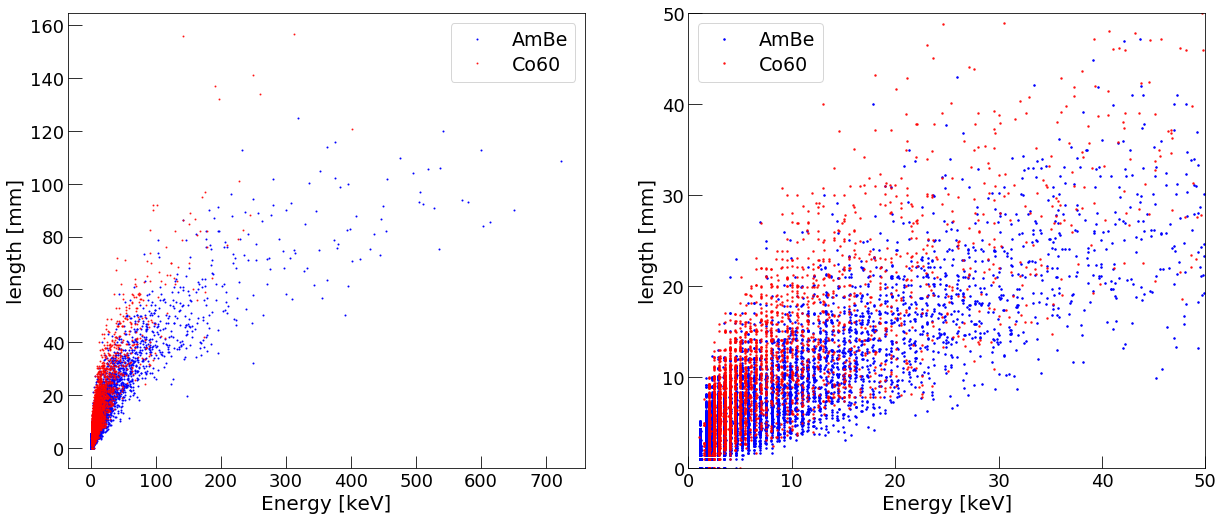

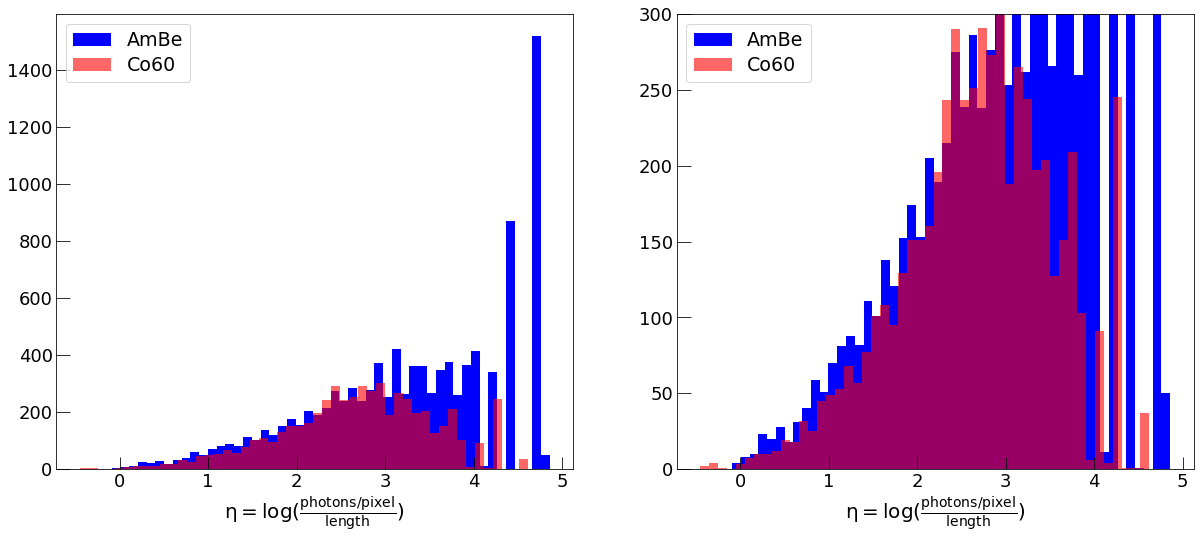

In [542]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(ambe['photons']/phKev, ambe['length']*rescale_pixelscale, 'b.', markersize=2, label='AmBe')
ax[0].plot(co60['photons']/phKev, co60['length']*rescale_pixelscale, 'r.', markersize=2, alpha=0.8, label='Co60')
ax[1].plot(ambe['photons']/phKev, ambe['length']*rescale_pixelscale, 'b.', markersize=3, label='AmBe')
ax[1].plot(co60['photons']/phKev, co60['length']*rescale_pixelscale, 'r.', markersize=3, alpha=0.8, label='Co60')

#plt.plot(cosmic['photons']/phKev, cosmic['length']*rescale_pixelscale, 'g.', markersize=2, alpha=0.4)

ax[0].set_xlabel("Energy [keV]")
ax[0].set_ylabel("length [mm]")
ax[1].set_xlabel("Energy [keV]")
ax[1].set_ylabel("length [mm]")

ax[1].set_xlim(0,50)
ax[1].set_ylim(0,50)
ax[0].legend()
ax[1].legend()

plt.show()
fig, ax = plt.subplots(1,2, figsize=(20, 8))

#ax[0].hist(ambe['length']*rescale_pixelscale, bins=100, color='b')
#ax[0].hist(co60['length']*rescale_pixelscale, bins=100, color='r', alpha=0.6)
ax[0].hist(np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0]*rescale_pixelscale)), bins=50,
           color='b', label='AmBe')
ax[0].hist(np.log(co60['ph_pixels']/(co60['length'][co60['length']>0]*rescale_pixelscale)), bins=50, 
           color='r', alpha=0.6, label='Co60')


ax[1].hist(np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0]*rescale_pixelscale)), bins=50, 
           color='b', label='AmBe')
ax[1].hist(np.log(co60['ph_pixels']/(co60['length'][co60['length']>0]*rescale_pixelscale)), bins=50, 
           color='r', alpha=0.6, label='Co60')
#ax[0].set_ylabel("counts")
ax[0].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
ax[1].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")

#ax[1].set_xlim(0,50)
ax[1].set_ylim(0,300)
ax[0].legend()
ax[1].legend()
plt.show()


In [664]:
ambe_h, ambe_bins = np.histogram(np.log(ambe['ph_pixels']/(ambe['length'][ambe['length']>0]*rescale_pixelscale)), 
                            bins=24, range=(0,6))
co60_h, co60_bins = np.histogram(np.log(co60['ph_pixels']/(co60['length'][co60['length']>0]*rescale_pixelscale)), 
                            bins=24, range=(0,6))

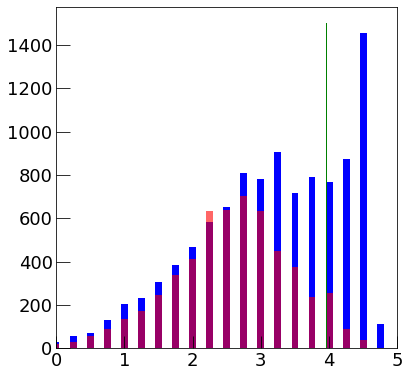

In [665]:
plt.bar(ambe_bins[:-1], ambe_h, width=0.1, color='b')
plt.bar(co60_bins[:-1], co60_h, width=0.1, color='r', alpha=0.6)
plt.plot((3.95, 3.95), (0,1500), 'g')
plt.xlim(0,5)
plt.show()

In [655]:
co60_bins[:-1][co60_h==0]

array([4.75, 5.  , 5.25, 5.5 , 5.75])

In [656]:
co60_bins

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  ])

In [698]:
#np.where(co60_bins==3.95)[0][0]
print("Contminazione: ", co60_h[co60_bins[:-1]>3.95].sum()/ambe_h[ambe_bins[:-1]>3.95].sum())

Contminazione:  0.11814214463840399


In [667]:
co60_h_cut=np.copy(co60_h)
co60_h_cut[co60_bins[:-1]>3.95]=0

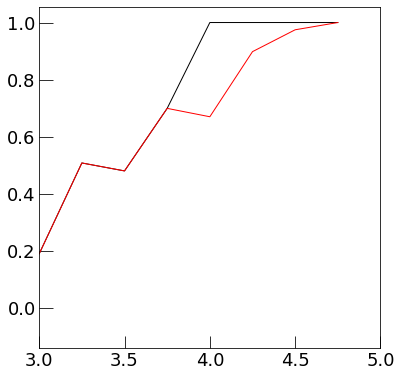

In [678]:
detec_eff = (ambe_h[ambe_h>0]-co60_h[ambe_h>0])/ambe_h[ambe_h>0]
detec_eff_cut = (ambe_h[ambe_h>0]-co60_h_cut[ambe_h>0])/ambe_h[ambe_h>0]

detec_bins = ambe_bins[:-1][ambe_h>0]
plt.plot(detec_bins, detec_eff_cut, color='k')
plt.plot(detec_bins, detec_eff, color='r')
plt.xlim(3,5)
plt.show()

In [598]:
len(detec_eff)

91

In [646]:
np.exp(3.95)

51.93536683483144

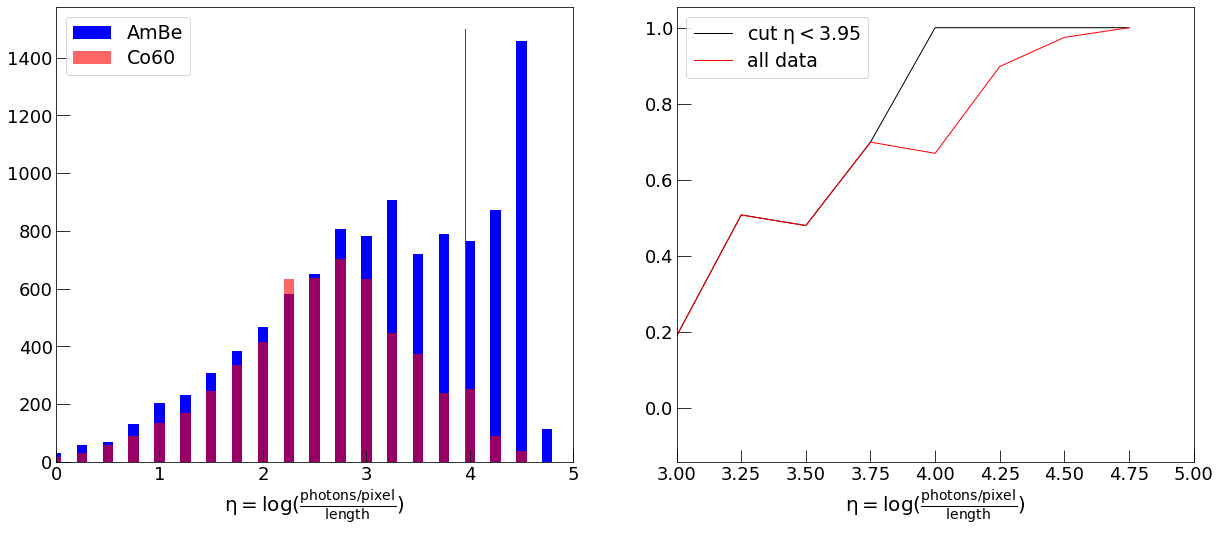

In [687]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].bar(ambe_bins[:-1], ambe_h, width=0.1, color='b', label='AmBe')
ax[0].bar(co60_bins[:-1], co60_h, width=0.1, color='r', alpha=0.6, label='Co60')
ax[0].plot((3.95, 3.95), (0,1500), 'g')
ax[0].set_xlim(0,5)
ax[0].legend()
ax[1].plot(detec_bins, detec_eff_cut, color='k', label=r'cut $\eta < 3.95$')
ax[1].plot(detec_bins, detec_eff, color='r', label='all data')
ax[1].set_xlim(3,5)
ax[1].legend()
ax[0].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
ax[1].set_xlabel(r"$\eta = log (\frac {photons/pixel} {length})$")
plt.show()

In [702]:
d = np.linspace(0, 80, 80)
lenght = d/np.exp(3.95)

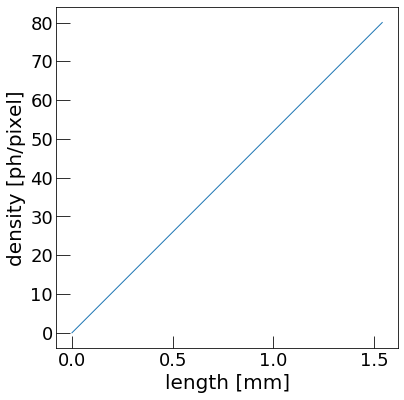

In [703]:
plt.plot(lenght, d)
plt.xlabel(r"length [mm]")
plt.ylabel(r"density [ph/pixel]")
plt.show()